<a href="https://colab.research.google.com/github/sonnick/Deep-learning/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
2+2

4

In [2]:
import pandas as pd
import numpy as np


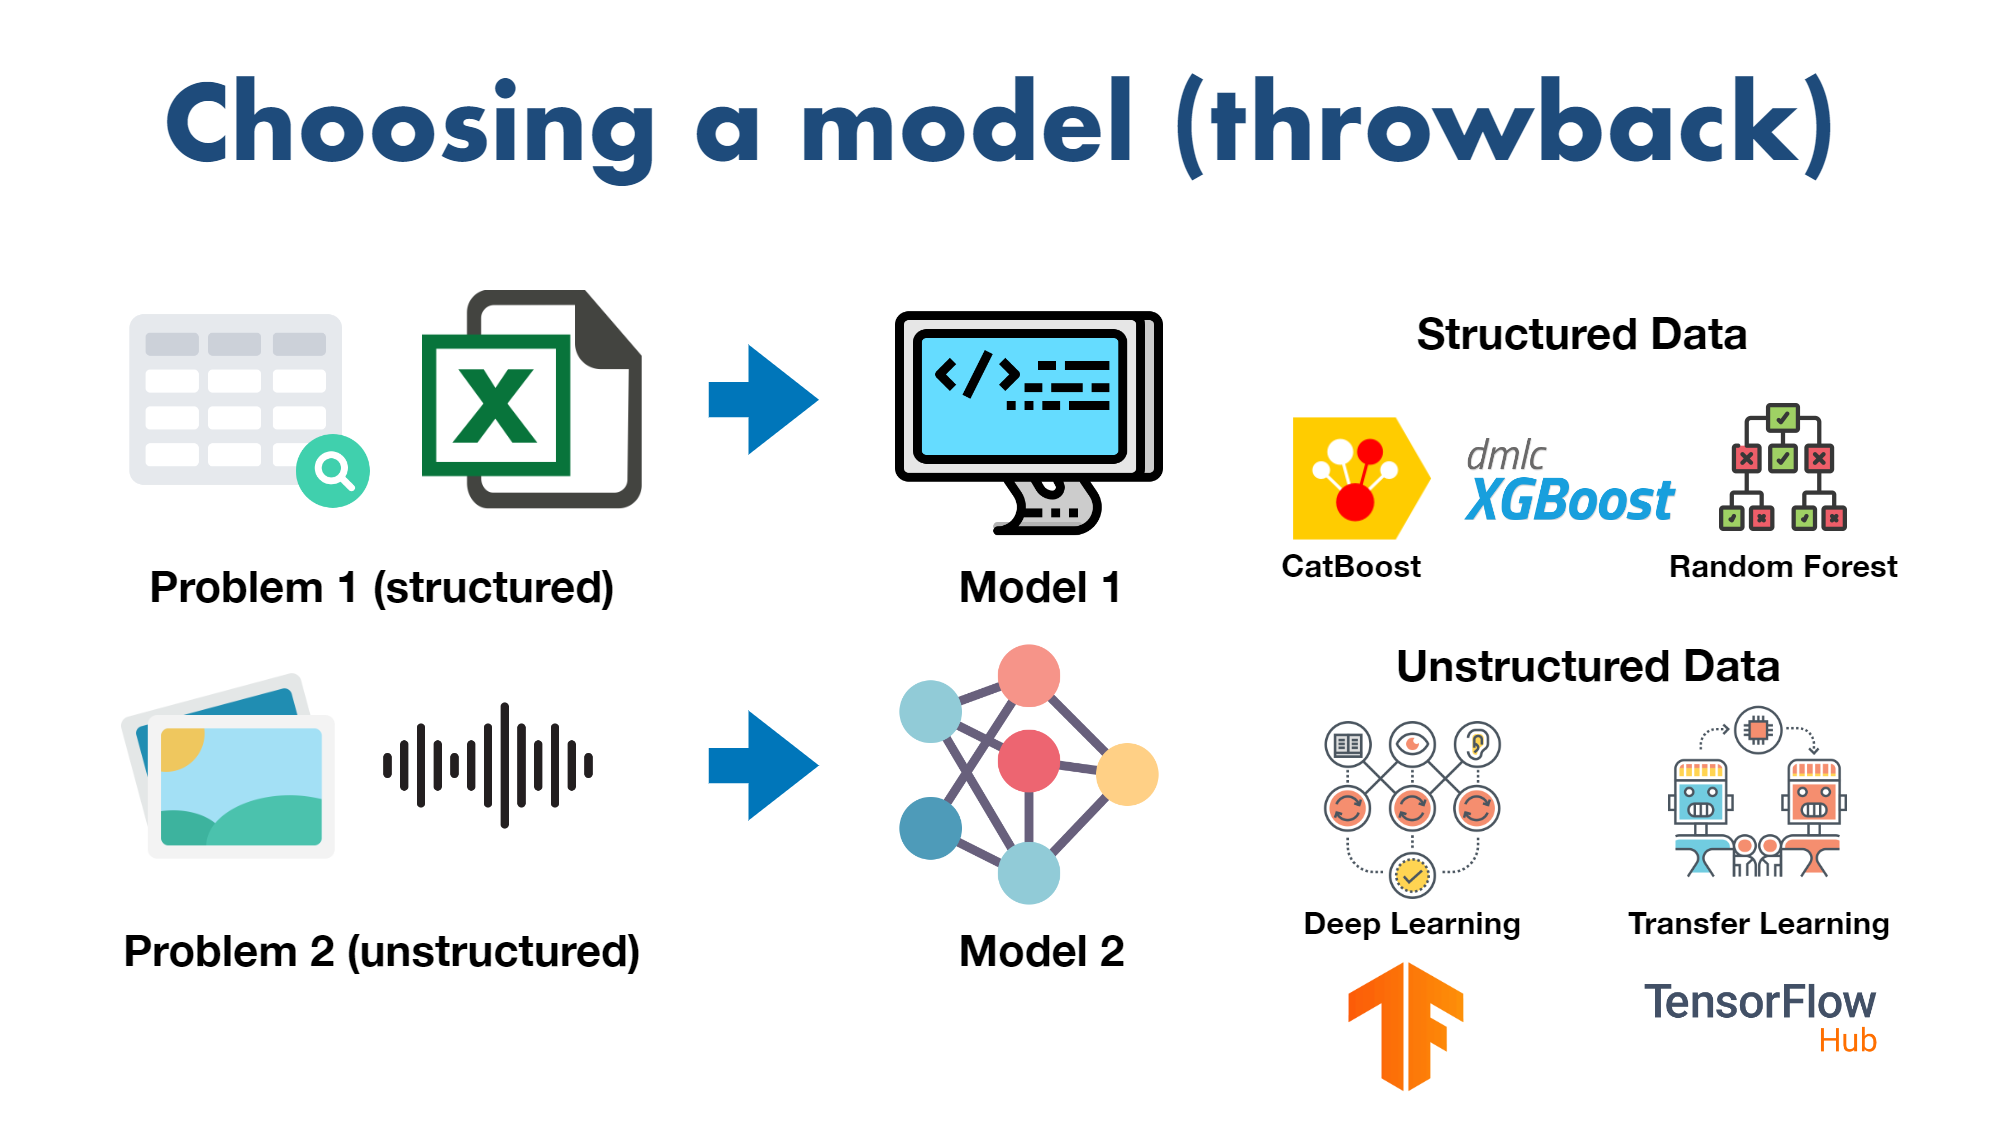

## **Project overview**

In [1]:
import numpy as np

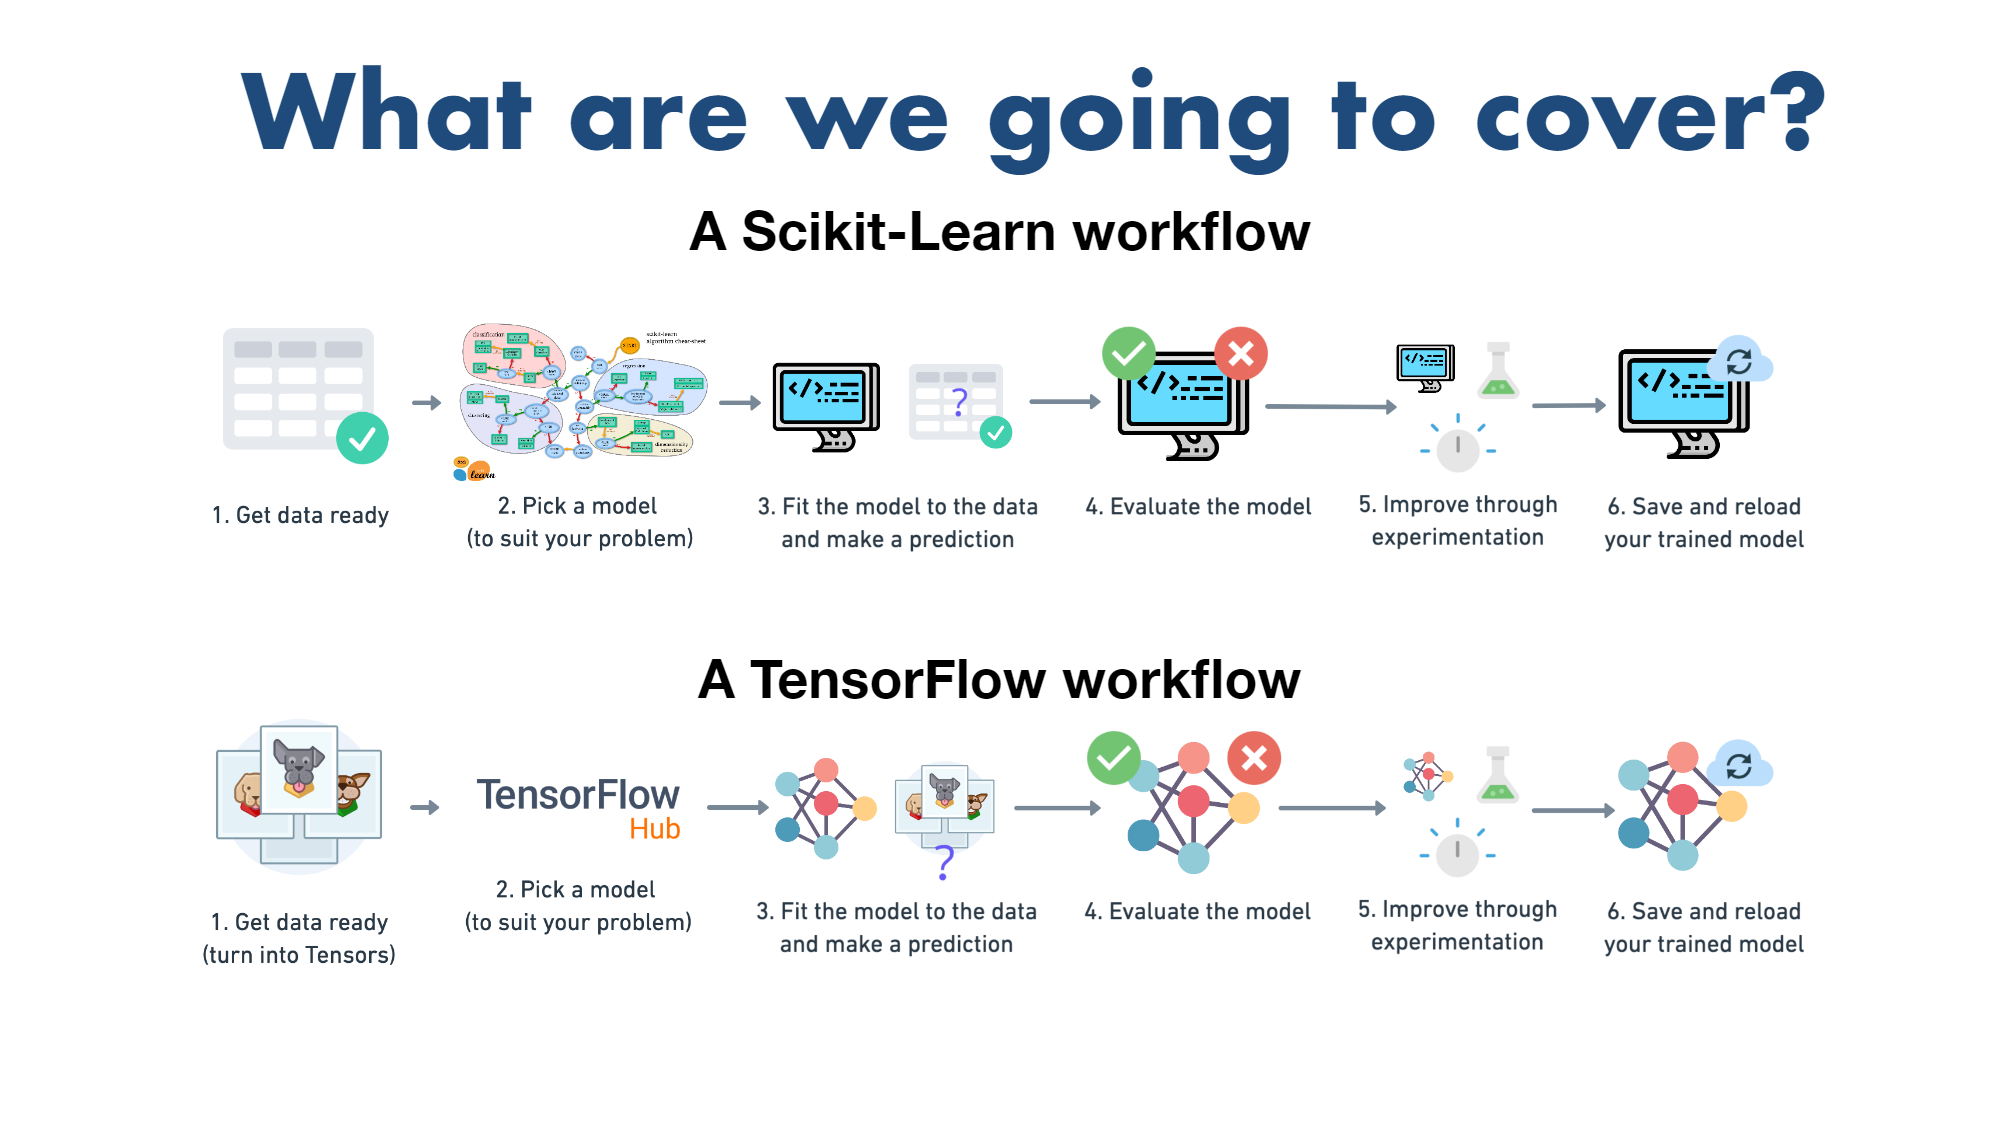

# 🐶 End-to-end Multil-class Dog Breed Classification

We are going to build an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

1: **Problem**

Lets define our problem so that we can have a goal we are working on: **Identifying the breed of a dog given an image of a dog.**

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2: **Data**

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

3: **Evaluation**

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. **Features**

Some information about the data:

We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
There are 120 breeds of dogs (this means there are 120 different classes).
There are around 10,000+ images in the training set (these images have labels).
There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

### Getting our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [3]:
# Import Tensorflow into colab
# Import Tensorflow hub

import tensorflow as tf
import tensorflow_hub as hub
print('TF Version', tf.__version__)
print('TF Hub version', hub.__version__)

# check if there is a GPU availability
print('GPU', 'available yes') if tf.config.list_physical_devices('GPU') else 'GPU not available'

TF Version 2.17.0
TF Hub version 0.16.1
GPU available yes


### Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the

In [4]:
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/Dog vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [6]:
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


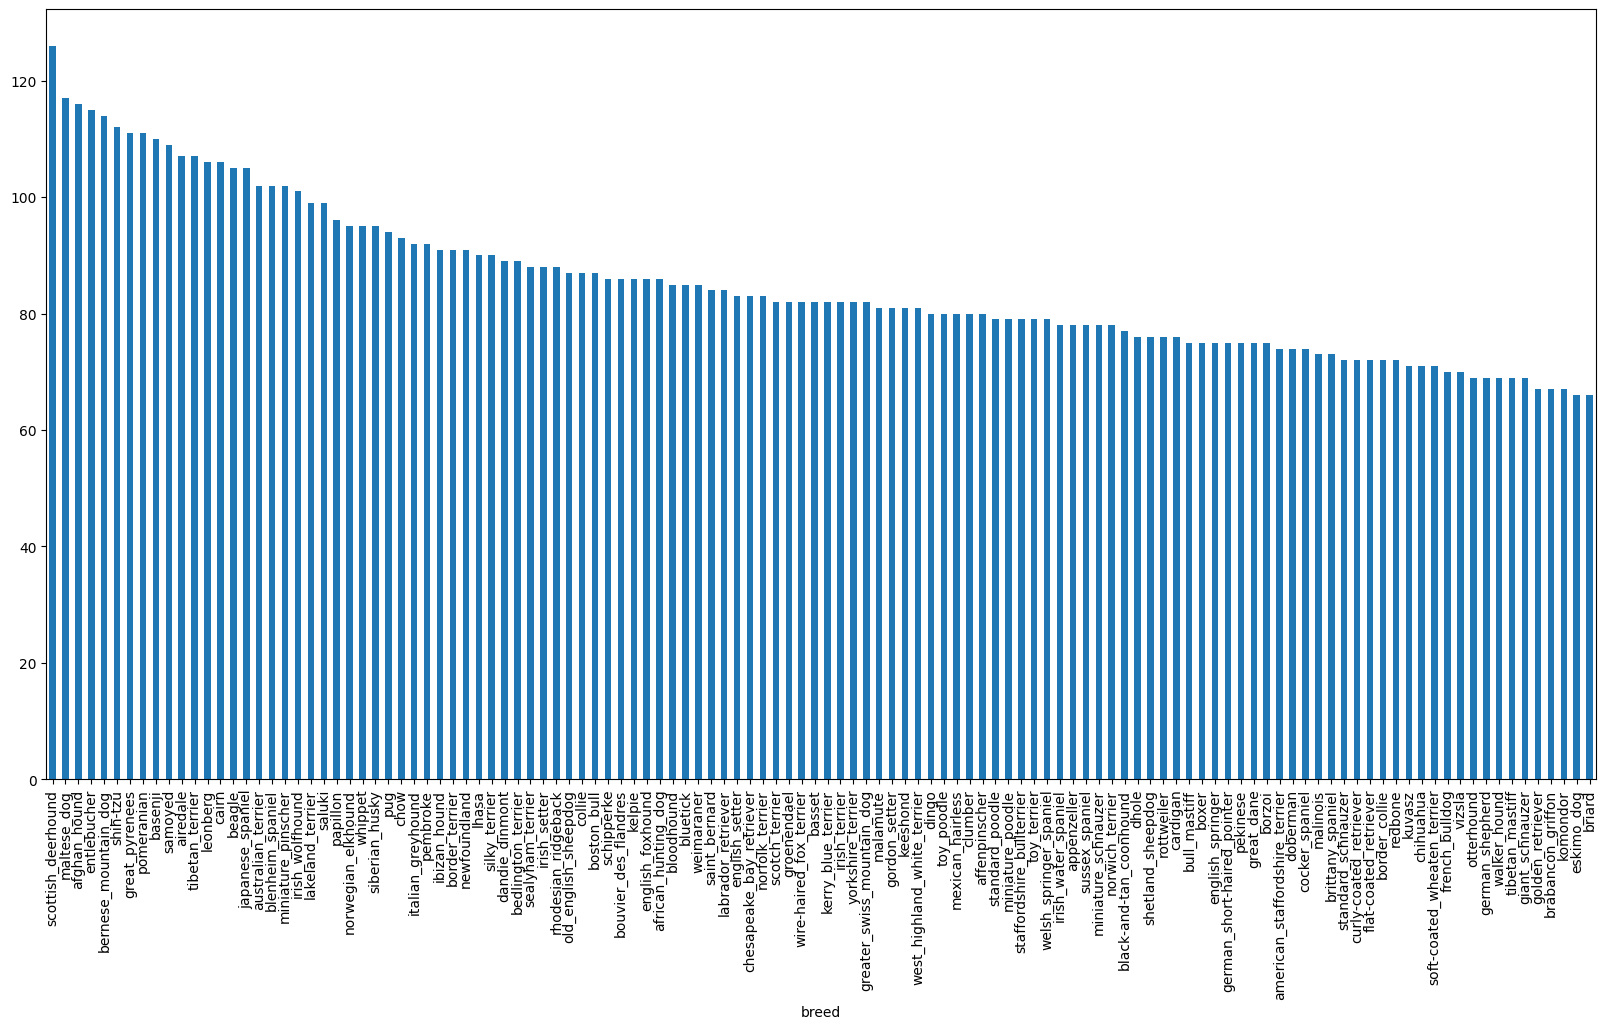

In [7]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
# The median number of images per class
labels_csv['breed'].value_counts().median()

82.0

In [ ]:
labels_csv['breed'].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


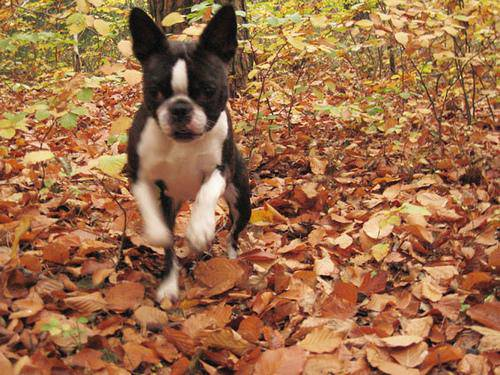

In [8]:
# Lets view an image
from IPython.display import Image
Image('/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Getting images and their labels

Lets get a list of all our image file pathnames

In [10]:
filename = [fname for fname in labels_csv['id']]
filename[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [11]:
filenames = ['/content/drive/MyDrive/Dog vision/train/'+ fname + '.jpg' for fname in labels_csv['id']]
filenames[:10]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:

import os
os.listdir('drive/MyDrive/Dog vision/train/')[:10]

['e80dbb78fb1d763d01d73b2f367c6805.jpg',
 'e8489d90981775781ccff2f27f7f413a.jpg',
 'e79a196a6e1772b9fa6b008b597d3a08.jpg',
 'e7f491cb903ff0a294eb63c625ef090e.jpg',
 'e7f4f3c25291884f2dfe7c60051d6949.jpg',
 'e8057e2f1e3bca4e9f4a2af48a9a9c46.jpg',
 'e7a8a3681524405b2e987ffbaff6d173.jpg',
 'e795a13bbfa8a72daeb315646f83068a.jpg',
 'e79f822b26adace4455db1fcd94ab47e.jpg',
 'e7c5692d044250d303a839d989132bf1.jpg']

In [14]:
len(os.listdir('drive/MyDrive/Dog vision/train/'))

10222

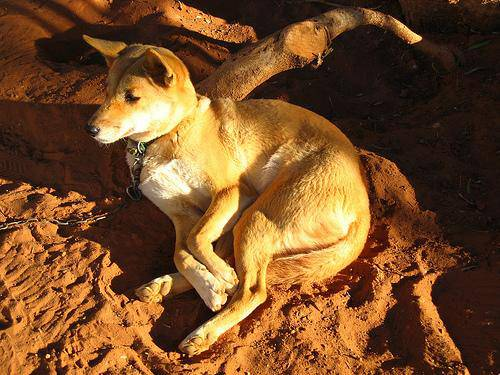

In [15]:
Image(filenames[1])

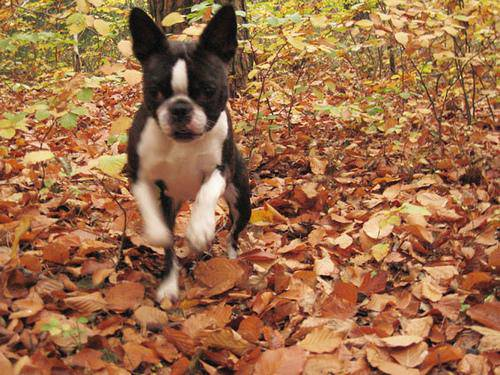

In [16]:
Image(filenames[0])

In [17]:
# Lets check whether the no of filenames matches no of actual image files
import os
if len(os.listdir('drive/MyDrive/Dog vision/train/')) == len(filenames):
  print('Filenames match, lets continue')
else:
  print('It doesnt match. review from hard drive')

Filenames match, lets continue


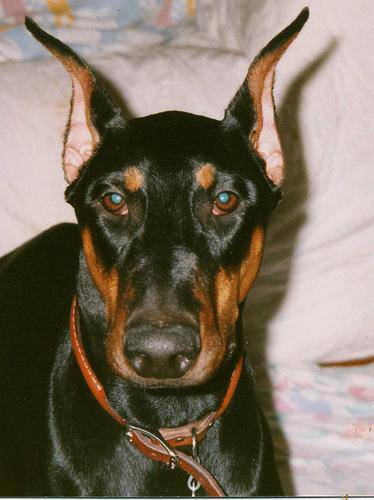

In [ ]:
Image(filenames[9001])

In [ ]:
labels_csv['breed'][9001]

'doberman'

Now that we've got our training image filepaths in a list. Lets prepare our labels

In [18]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Another way to do this is

import numpy as np
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
labels_csv['breed'][:10]

,breed
0,boston_bull
1,dingo
2,pekinese
3,bluetick
4,golden_retriever
5,bedlington_terrier
6,bedlington_terrier
7,borzoi
8,basenji
9,scottish_deerhound


In [20]:
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [21]:
len(labels)

10222

In [22]:
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames')
else:
  print('It doesnt match, check')

Number of labels matches number of filenames


In [25]:
unique_breeds = np.unique(labels)
len(unique_breeds)
# This shows us that we have 120 different breeds of dog

120

In [26]:
len(np.unique(labels_csv['breed']))

120

In [27]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [28]:
# Turn every label into  a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [29]:
len(boolean_labels)

10222

In [32]:
print(boolean_labels[0])

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [ ]:
# Lets make an example of turning boolean into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [33]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set
Since our dataset doesn't come with a validation set, we're going to create our own.

In [34]:
# set up x and y variable
x = filenames
y = boolean_labels

In [39]:
x[:2], y[:1]

(['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

 Lets start experimenting with 1000 images and increase as needeed. Reason it takes long to train 10,000 images for experimenting our data

In [35]:
# Lets Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: 'slider', min:1000, max:10000, step:1000}

In [75]:
# Split our dataset into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [76]:
# Lets view
x_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
Return the modified `image`

Lets see how our importing would work

In [77]:
# Conver image into NumPy array

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [78]:
image.max()

255

In [45]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [79]:
# Turn image into tensor
tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [80]:
# Define image size
IMG_SIZE = 224

# Lets create a function for preprocessing images

def process_image(image_path, img_size = IMG_SIZE):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size= [IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches
We have to turn our images into batches a long list of images might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time which can be manually adjusted if need be

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label).

In [81]:
#  Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and returns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [82]:
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [83]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [84]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [85]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [86]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [58]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

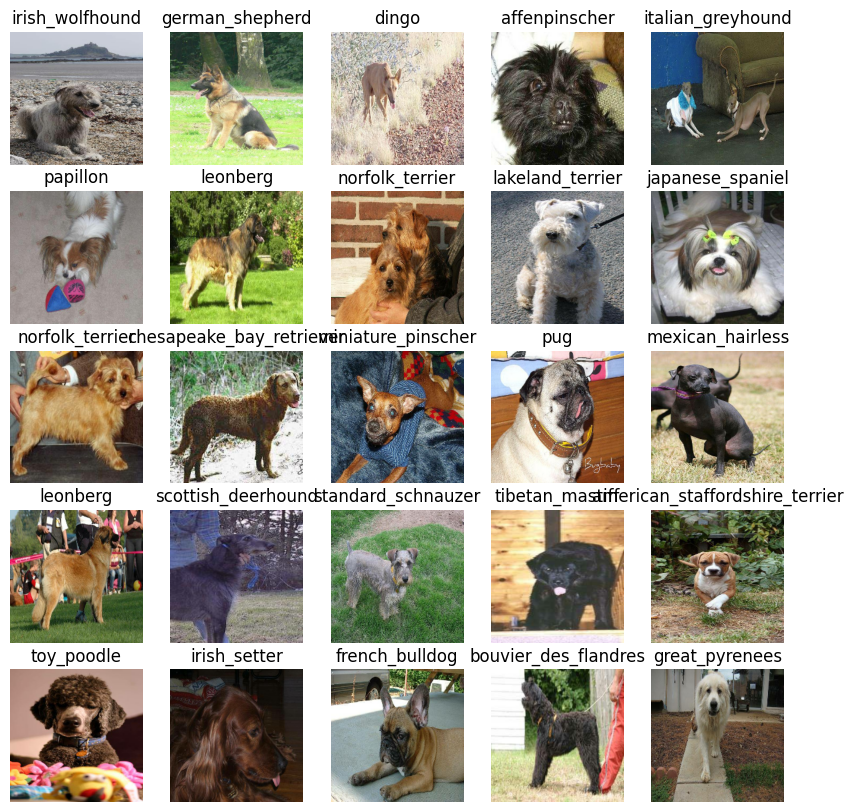

In [87]:
# # Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

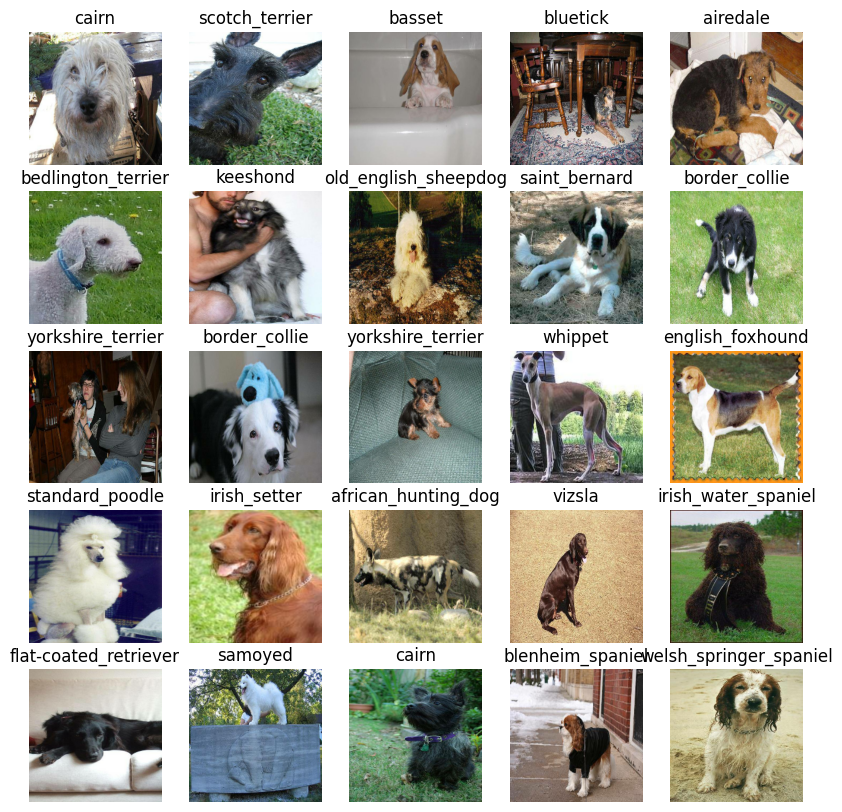

In [88]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model.
The output shape (image labels, in the form of Tensors) of our model.
The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [61]:
IMG_SIZE

224

In [109]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [90]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.
Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
Compiles the model (says it should be evaluated and improved).
Builds the model (tells the model the input shape it'll be getting).
Returns the model.
All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [106]:
# # Ignore this code use the one siimilar below because the version of tensor flow changed
# # Create a function which builds a Keras model

# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#   print("Building model with:", MODEL_URL)

#   # Setup the model layers
#   model = tf.keras.Sequential([
#     hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
#     tf.keras.layers.Dense(units=OUTPUT_SHAPE,
#                           activation="softmax") # Layer 2 (output layer)
#   ])

#   # Compile the model
#   model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(),
#       optimizer=tf.keras.optimizers.Adam(),
#       metrics=["accuracy"]
#   )

#   # Build the model
#   model.build(INPUT_SHAPE)

#   return model

In [112]:
#  # Create a function which build a Keras model
# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#     print("Building model with:", MODEL_URL)
#     # Setup the model layers
#     model = tfk.Sequential([
#         hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
#         tfk.layers.Dense(units=OUTPUT_SHAPE,
#                               activation="softmax") # Layer 2 (output layer)
#     ])
#     # Compile the model
#     model.compile(
#         loss=tfk.losses.CategoricalCrossentropy(),
#         optimizer=tfk.optimizers.Adam(),
#         metrics=["acccuracy"]
#     )
#     # Build the model
#     model.build(INPUT_SHAPE)
#     return model

In [146]:
# 3 This one works too
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  hubs_layer = hub.KerasLayer(MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: hubs_layer(x)), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
                            ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

## Building the model
We use model.build() whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

We will leave our Batch size as None since this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

We've gone through each section of the function, let's use it to create a model.

We can call summary() on our model to get idea of what our model looks like.

In [134]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_18 (KerasLayer  (None, 1001)              5432713   
 )                                                               
                                                                 
 dense_7 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [147]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 120)                 │         120,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

From the results we can tell that the non-trainable parameters are the patterns learned by mobilenet_v2_130_224 and the trainable parameters are the ones in the dense layer we added.

This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.

## Creating callbacks
Our model is ready, but before starting the training, we'll set up some callbacks.

Callbacks are utility functions that a model can use during training to perform tasks like saving progress, monitoring performance, or stopping early if improvement stalls.

We'll be using two callbacks: a TensorBoard callback for tracking training metrics and an Early Stopping callback to halt training if the model stops improving.

## TensorBoard Callback
TensorBoard offers a visual way to track your model's progress during and after training.

It allows you to monitor key performance metrics like loss and accuracy directly within a notebook.

To set up a TensorBoard callback and view it in a notebook, we need to follow three steps:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback that saves logs to a specified directory and pass it into our model's fit() function.
3. Visualize the training logs using the %tensorboard magic function (we'll cover this later).

In [114]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [148]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
Early stopping is a technique that helps prevent overfitting by halting model training when a specific evaluation metric stops improving.

If a model trains for too long, it can become too specialized in recognizing patterns from the training dataset, leading to poor generalization on new, unseen data.

Essentially, it's like telling the model, "keep learning patterns, but stop when the quality of those patterns begins to degrade."

In [149]:
# create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

## Training a model- First on a subset of data

We’ll start by training our first model on a subset of 1,000 images: either training on 800 images with validation on the remaining 200 or using the full 1,000 for training only. This represents roughly 10% of our total dataset and serves as a preliminary check to confirm that our setup is working as expected. Once verified, we can expand to the full dataset for training.

Before beginning training, we need to define NUM_EPOCHS (the number of epochs). This parameter specifies how many full passes the model will make over the data, with each pass allowing it to find and refine patterns relevant to the labels.

For instance, setting NUM_EPOCHS=1 would mean the model only passes over the data once, likely resulting in poor performance since it won’t have enough iterations to learn and correct itself. Imagine if you were competing in an international hill descent race, but your friend Adam could only give you one tip—chances are, you’d struggle!

So, what’s a good value for NUM_EPOCHS? It depends. We might start with 10, but in some cases, 100 could be better. This is where our early stopping callback becomes essential. With early stopping, if we set NUM_EPOCHS=100 but the model stops improving after 22 epochs, training will automatically halt to save time and resources.

Lastly, let’s confirm that we’re still using a GPU to ensure optimal training speed.


In [150]:
# Check again if GPU is available because computing without it, computing takes a long time)
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [151]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Now that we got our GPU running and NUM_EPOCHS setup, Let's create a simple function which trains a model. The function will:
1. Create a model using create_model().
2. Set up a TensorBoard callback using create_tensorboard_callback() to generate a log directory with the current date and time.
3. Call the fit() function on our model, providing the training data, validation data, number of epochs, and any callbacks we want to apply.
4. Return the trained model.

In [152]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

NB: The reason we have started with 1000 images is that, When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised.

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.0328 - loss: 5.2566 - val_accuracy: 0.2550 - val_loss: 3.3718
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - accuracy: 0.6575 - loss: 1.9244 - val_accuracy: 0.5100 - val_loss: 2.1155
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9523 - loss: 0.6147 - val_accuracy: 0.6200 - val_loss: 1.5975
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9869 - loss: 0.2571 - val_accuracy: 0.6250 - val_loss: 1.4247
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.9967 - loss: 0.1465 - val_accuracy: 0.6500 - val_loss: 1.3469
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 297ms/step - accuracy: 1.0000 - loss: 0.0977 - val_accuracy: 0.6500 - val_loss: 1.2928
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 1.0000 - loss: 0.0732 - val_accuracy: 0.6600 - val_loss: 1.2691
Epoc

We have our model overfitting. Overfitting to begin with is a good thing. It means our model is learning something.

### Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

Since we implemented early stopping callback, the model stopped training after 27 epochs, yours might vary as well
The validation accuracy is less but if we scale up the number of images, we would see a better accuracy score

## Making and evaluating predictions using a trained model

Before we scale up and train on more data, let’s explore additional ways to evaluate our model. While accuracy gives a good sense of its performance, seeing the model in action would provide even deeper insights.

Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on

In [139]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 35s 5s/step


array([[0.03482946, 0.00295939, 0.00032996, ..., 0.00351352, 0.00311004,
        0.00482053],
       [0.001843  , 0.00101157, 0.00201335, ..., 0.01386331, 0.00297394,
        0.00761989],
       [0.00061946, 0.00538326, 0.01948787, ..., 0.01896624, 0.0019627 ,
        0.00125338],
       ...,
       [0.0013248 , 0.00817538, 0.00072211, ..., 0.0087778 , 0.00165043,
        0.01546315],
       [0.01355785, 0.00099241, 0.00342011, ..., 0.01407889, 0.00178064,
        0.00242266],
       [0.00035165, 0.04215227, 0.03298995, ..., 0.05288866, 0.00084769,
        0.00058655]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

When we make predictions with our model, it returns an array with a probability for each label.

For instance, predicting on the validation set (200 images) generates a predictions array of arrays, each containing 120 values—one for each unique dog breed. These values represent the model's confidence that an image belongs to a particular breed. The higher the probability, the more likely the model believes the image matches that breed.

Now, let’s look at how to convert this array of probabilities into an actual label.

In [ ]:
# Lets try this with prediction 1  which should be index 0

print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

Having this information is useful, but it’s even more valuable if we can compare each prediction with its true label and original image.

To make this comparison easier, let’s first create a small function that converts prediction probabilities—also known as confidence levels—into predicted labels

In [1]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

Great! Now that we have a list of all the predictions our model has made, we’ll do the same for the validation images and labels.

Keep in mind that the model hasn’t trained on the validation data; during the fit() function, it only used the validation data for evaluation. This allows us to use the validation images to visually compare the model’s predictions with the actual labels.

Since our validation data `(val_data)` is in batch form, we’ll need to "unbatch" it using `unbatch()` and convert it into an iterator with `as_numpy_iterator()` to get a full list of validation images and labels.

Let’s create a quick function to handle this process.

In [ ]:
# Lets create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

Awesome! Now we have methods to retrieve:

1. Prediction labels
2. Validation labels (true labels)
3. Validation images

To make everything more visual, let’s create a few functions. Specifically, we want to be able to view each image alongside its predicted label and actual (true) label.

Our first function will:

* Take an array of prediction probabilities, an array of true labels, an array of images, and an integer as input.
* Convert the prediction probabilities into a predicted label.
* Plot the predicted label, its prediction probability, the true label, and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)


In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)


Since we’re working with a multi-class problem (120 different dog breeds), it’s helpful to see not only the model's top prediction but also its other guesses. For example, if the model predicts a label with 24% probability, what were its next best predictions?

Let’s create a function to showcase this. The function will:

* Accept a prediction probabilities array, a ground truth labels array, and an integer as input.
* Determine the predicted label using get_pred_label().
* Find the top 10:
 * Prediction probability indexes
 * Prediction probability values
 * Prediction labels
* Plot the top 10 prediction probabilities with labels, highlighting the true label in green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

After training a model, it’s a good practice to save it. This allows you to share it with colleagues, deploy it in applications, and, importantly, avoid the potentially costly process of retraining.

The standard format for saving an entire Keras model is .h5. Let’s create a function that takes a model as input and uses the `save()` method to save it as an .h5 file in a specified directory

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

If we have a saved model, we’ll want to load it for further use. Let’s create a function that takes a model path and uses `tf.keras.models.load_model()` to load the model into the notebook.

Since we’re using a component from TensorFlow Hub `(hub.KerasLayer)`, we’ll also pass this as a parameter to the `custom_objects` argument.

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-trial-images-Ada")

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Data/models/20200131-02551580439347-1000-trial-images-Ada.h5')

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

## Now Training a model on the full data

Now that we’ve confirmed our model works on a subset of the data, we can move forward with training it on the full dataset.

Earlier, we saved all the training file paths to X and the training labels to y. Let’s take a look at them.

In [ ]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

Before training a model on the full dataset, we’ll need to convert our data into batches.

Luckily, we can reuse our `create_data_batches()` function from earlier, which also preprocesses our images—thanks to our past selves for creating such a useful function!

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Our data is in a data batch, all we need now is a model.

And surprise, we've got a function for that too! Let's use create_model() to instantiate another model.

In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Now that we've made a new model instance, `full_model`, we'll need some callbacks too.

In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

To monitor the model during training, we’ll load TensorBoard. It should update approximately every 30 seconds as the model trains.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

**Note** : Running the cell below will train the model on all of the data (over 10,000 images), so it may take a significant amount of time to start and complete. Fortunately, our full_model_early_stopping callback will ensure that training stops before it goes on for too long.

Keep in mind that the first epoch will always take the longest due to data loading into memory. Once the data is loaded, subsequent epochs will be faster.

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

## Saving and reloading the full model

Even with a GPU, training our full model took some time, so it's wise to save it.

We can accomplish this using our save_model() function.

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Data/models/20200131-03111580440309-all-images-Adam.h5')

## Making predictions on the test dataset

Since our model has been trained on images formatted as Tensor batches, we need to convert the test data into the same format for making predictions.

Fortunately, we previously created the `create_data_batches()` function, which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we’ll:

* Retrieve the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()`, ensuring the test_data parameter is set to `True` (since there are no labels associated with the test images).
* Generate a predictions array by passing the test data batches to the `predict()` function.

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/Data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

In [ ]:
# How many test images are there?
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

**Note**: Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)


In [ ]:
# save predictions (Numpy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")


In [ ]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter = ',')

In [ ]:
# Check out the test predictions
test_predictions[:10]

## Preparing test dataset predictions

From our submission instructions, it appears they require the model's output probabilities for each label, along with the image IDs.

To format the data accordingly, we’ll:

* Create a pandas DataFrame that includes an ID column and a column for each dog breed.
* Populate the ID column by extracting the test image IDs from their file paths.
* Fill in the prediction probabilities for each dog breed column using the `unique_breeds` list and the `test_predictions list`.
* Export the DataFrame as a CSV file for submission to Kaggle.

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("drive/My Drive/Data/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

## Making predictions on custom images

It’s great to be able to make predictions on a provided test dataset. But how could we use our model to make predictions on our own images?

The process is similar: we need to pass our custom images to the model in the same format it was trained on.

Here’s how we’ll do it:

* Obtain the file paths of our own images.
* Convert these file paths into data batches using `create_data_batches()`. Since our custom images won’t have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model’s `predict()` method.
* Convert the prediction output probabilities to predicted labels.
* Compare the predicted labels with the custom images.

**Note**: To make predictions on custom images, you’ll need to upload your images to a directory (e.g., `drive/My Drive/Data/dogs/` as shown below). To make predictions on your own images, set up a similar directory.

In [ ]:
# Get custom image filepaths
custom_path = "drive/My Drive/Data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

Now we've got some predictions arrays, let's convert them to labels and compare them with each image.

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)